In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
# Common imports
import numpy as np
import os


#importo libreria panda per leggere ed elaborare csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)

In [3]:
train_data=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/train_data.csv')
test_data=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/test_data.csv')
y_train=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/train_y.csv')
y_test=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/test_y.csv')

In [4]:
scaled_dataset = StandardScaler().fit_transform(train_data)
scaled_testset = StandardScaler().fit_transform(test_data)

In [28]:
KNN = KNeighborsClassifier(n_neighbors=30,n_jobs=-1,weights='distance' )
KNN.fit(train_data, np.ravel(y_train))
KNN.score(test_data, np.ravel(y_test))

0.7433254945358971

In [29]:
KNN = KNeighborsClassifier(n_neighbors=30,n_jobs=-1,weights='distance' )
KNN.fit(scaled_dataset, np.ravel(y_train))
KNN.score(scaled_testset, np.ravel(y_test))

0.8203416793470742

Confronto tra dati scalati e non

Text(0.5, 1.0, 'Accuracy in base a scaling dati')

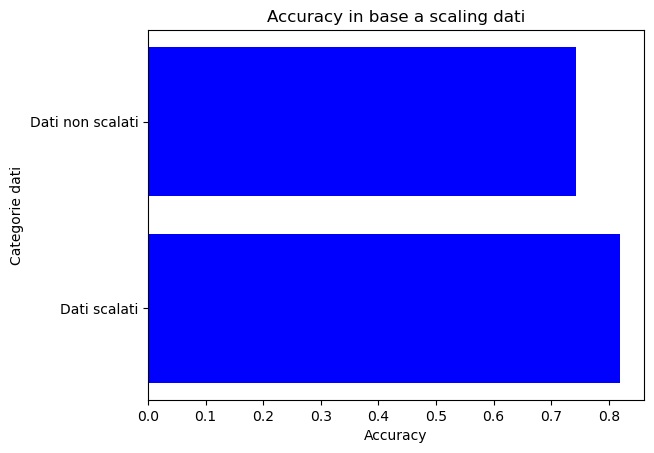

In [57]:
categorie=["Dati scalati","Dati non scalati"]
accuracy=[0.8203,0.7433]
plt.barh(categorie, accuracy, color='blue')

plt.ylabel('Categorie dati')
plt.xlabel('Accuracy')
plt.title('Accuracy in base a scaling dati')

In [55]:
KNN = KNeighborsClassifier(n_neighbors=30,n_jobs=-1,weights='distance',p=1 )
KNN.fit(scaled_dataset, np.ravel(y_train))
KNN.score(scaled_testset, np.ravel(y_test))

0.8425785032507954

In [56]:
KNN = KNeighborsClassifier(n_neighbors=100,n_jobs=-1,weights='distance',p=1 )
KNN.fit(scaled_dataset, np.ravel(y_train))
KNN.score(scaled_testset, np.ravel(y_test))

0.8341402683635357

In [64]:
parametri=["Start","Minkowski metric","n_neighbors"]
accuracy=[0.8203,0.8425,0.8341]


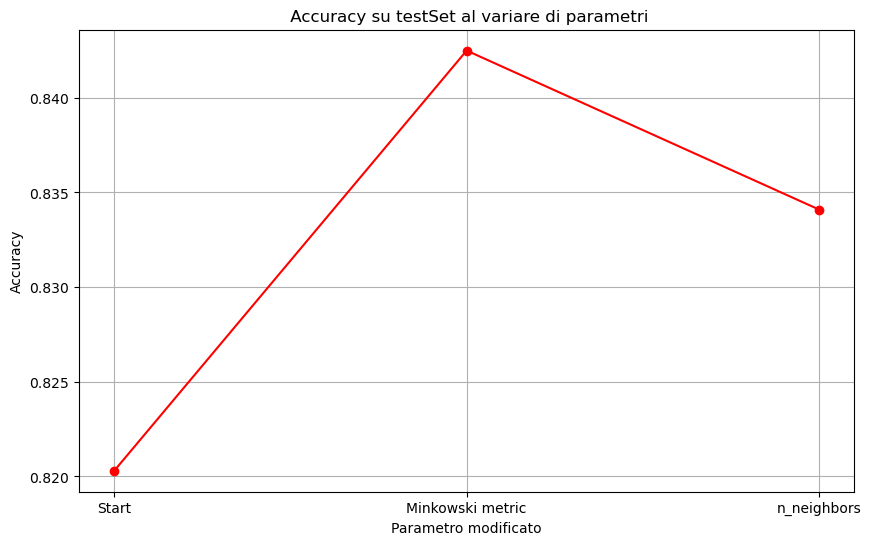

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(parametri, accuracy, marker='o', linestyle='-', color='r')
plt.title(' Accuracy su testSet al variare di parametri')
plt.xlabel('Parametro modificato')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(parametri)
plt.show()

In [8]:
N = [ 5 , 10, 20, 30, 50, 80,100]
#N = [ 1 , 2, 3, 4, 5, 6, 7,8]

train_accuracy =np.empty(len(N))
test_accuracy = np.empty(len(N))

KNN_results = []
i=0;
for n in N:
  KNN = KNeighborsClassifier(n_neighbors=n,weights='distance',n_jobs=-1,p=1)
  KNN.fit(scaled_dataset,np.ravel(y_train))
  testset_score = KNN.score(scaled_testset, np.ravel(y_test))
  #Compute accuracy on the training set
  train_accuracy[i] = KNN.score(scaled_dataset, np.ravel(y_train))
    
    #Compute accuracy on the test set
  test_accuracy[i] = testset_score
  KNN_results.append([n, testset_score])
  print(f"Score di KNN con {n} neighbors sul testset: {testset_score}")
  i+=1

Score di KNN con 5 neighbors sul testset: 0.8306473924470881
Score di KNN con 10 neighbors sul testset: 0.8417830958638816
Score di KNN con 20 neighbors sul testset: 0.8452413888504634
Score di KNN con 30 neighbors sul testset: 0.8425785032507954
Score di KNN con 50 neighbors sul testset: 0.8396389542122008
Score di KNN con 80 neighbors sul testset: 0.8357310831373634
Score di KNN con 100 neighbors sul testset: 0.8341402683635357


In [9]:
KNN_test_scores = pd.DataFrame(KNN_results, columns=['n_neighbors','testset_score'])
KNN_test_scores

,n_neighbors,testset_score
0,5,0.830647
1,10,0.841783
2,20,0.845241
3,30,0.842579
4,50,0.839639
5,80,0.835731
6,100,0.834140


<AxesSubplot:title={'center':'score sul testset'}, xlabel='n_neighbors', ylabel='testset_score'>

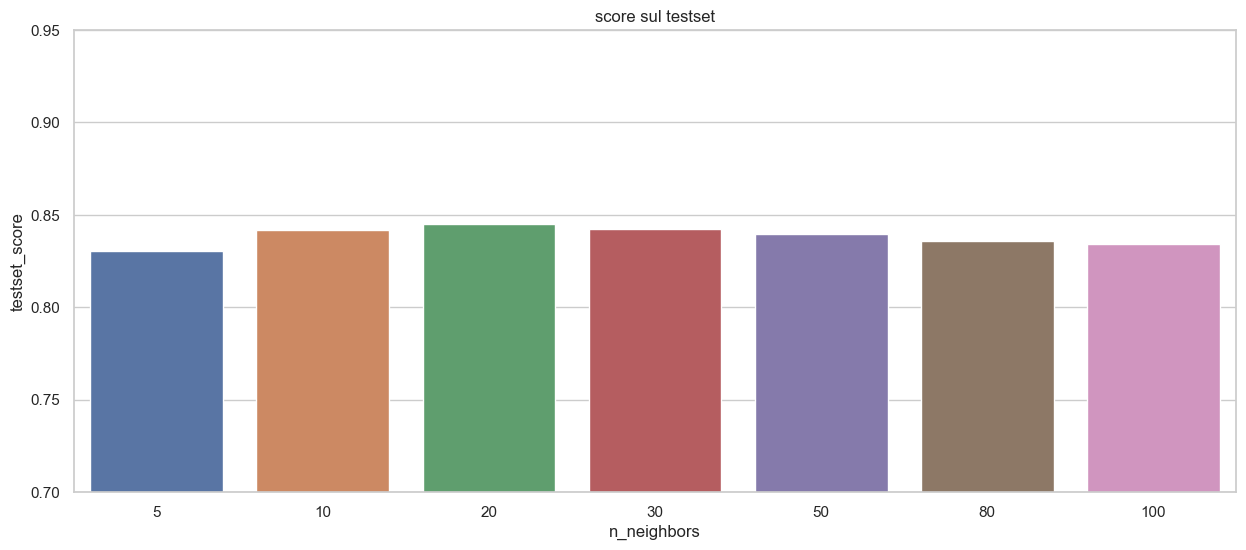

In [10]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(15,6))
axs.set_ylim([0.7,0.95])
axs.set_title("score sul testset")
sns.barplot(data=KNN_test_scores, x='n_neighbors',y="testset_score",ax=axs)

In [4]:
KNN = KNeighborsClassifier(n_jobs=-1)
param_grid = {
   
    "n_neighbors": [  5, 10, 30, 50, 70, 100, 200],
     "weights": ['uniform', 'distance'],
    "p":[1,2],
   
}

rnd_knn_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, verbose=10, n_jobs=1)
rnd_knn_search.fit(scaled_dataset,np.ravel(y_train) )


Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5; 1/28] START n_neighbors=5, p=1, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 1/28] END n_neighbors=5, p=1, weights=uniform;, score=0.830 total time=   2.7s
[CV 2/5; 1/28] START n_neighbors=5, p=1, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 1/28] END n_neighbors=5, p=1, weights=uniform;, score=0.828 total time=   2.7s
[CV 3/5; 1/28] START n_neighbors=5, p=1, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 1/28] END n_neighbors=5, p=1, weights=uniform;, score=0.829 total time=   2.8s
[CV 4/5; 1/28] START n_neighbors=5, p=1, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 1/28] END n_neighbors=5, p=1, weights=uniform;, score=0.829 total time=   2.7s
[CV 5/5; 1/28] START n_neighbors=5, p=1, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 1/28] END n_neighbors=5, p=1, weights=uniform;, score=0.834 total time=   2.7s
[CV 1/5; 2/28] START n_neighbors=5, p=1, weights=distance.......................
[CV 1/5; 2/28] END n_neighbors=5, p=1, weights=distance;, score=0.827 total time=   2.6s
[CV 2/5; 2/28] START n_neighbors=5, p=1, weights=distance.......................
[CV 2/5; 2/28] END n_neighbors=5, p=1, weights=distance;, score=0.825 total time=   2.6s
[CV 3/5; 2/28] START n_neighbors=5, p=1, weights=distance.......................
[CV 3/5; 2/28] END n_neighbors=5, p=1, weights=distance;, score=0.826 total time=   2.5s
[CV 4/5; 2/28] START n_neighbors=5, p=1, weights=distance.......................
[CV 4/5; 2/28] END n_neighbors=5, p=1, weights=distance;, score=0.825 total time=   2.5s
[CV 5/5; 2/28] START n_neighbors=5, p=1, weights=distance.......................
[CV 5/5; 2/28] END n_neighbors=5, p=1, weights=distance;, score=0.830 total time=   2.5s
[CV 1/5; 3/28] START n_neighbors=5, p=2, weights=uniform......

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 3/28] END n_neighbors=5, p=2, weights=uniform;, score=0.815 total time=   0.7s
[CV 2/5; 3/28] START n_neighbors=5, p=2, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 3/28] END n_neighbors=5, p=2, weights=uniform;, score=0.815 total time=   0.7s
[CV 3/5; 3/28] START n_neighbors=5, p=2, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 3/28] END n_neighbors=5, p=2, weights=uniform;, score=0.814 total time=   0.7s
[CV 4/5; 3/28] START n_neighbors=5, p=2, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 3/28] END n_neighbors=5, p=2, weights=uniform;, score=0.814 total time=   0.7s
[CV 5/5; 3/28] START n_neighbors=5, p=2, weights=uniform........................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 3/28] END n_neighbors=5, p=2, weights=uniform;, score=0.817 total time=   0.7s
[CV 1/5; 4/28] START n_neighbors=5, p=2, weights=distance.......................
[CV 1/5; 4/28] END n_neighbors=5, p=2, weights=distance;, score=0.813 total time=   0.6s
[CV 2/5; 4/28] START n_neighbors=5, p=2, weights=distance.......................
[CV 2/5; 4/28] END n_neighbors=5, p=2, weights=distance;, score=0.812 total time=   0.6s
[CV 3/5; 4/28] START n_neighbors=5, p=2, weights=distance.......................
[CV 3/5; 4/28] END n_neighbors=5, p=2, weights=distance;, score=0.812 total time=   0.6s
[CV 4/5; 4/28] START n_neighbors=5, p=2, weights=distance.......................
[CV 4/5; 4/28] END n_neighbors=5, p=2, weights=distance;, score=0.812 total time=   0.6s
[CV 5/5; 4/28] START n_neighbors=5, p=2, weights=distance.......................
[CV 5/5; 4/28] END n_neighbors=5, p=2, weights=distance;, score=0.814 total time=   0.6s
[CV 1/5; 5/28] START n_neighbors=10, p=1, weights=uniform.....

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 5/28] END n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   2.9s
[CV 2/5; 5/28] START n_neighbors=10, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 5/28] END n_neighbors=10, p=1, weights=uniform;, score=0.834 total time=   2.8s
[CV 3/5; 5/28] START n_neighbors=10, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 5/28] END n_neighbors=10, p=1, weights=uniform;, score=0.837 total time=   2.7s
[CV 4/5; 5/28] START n_neighbors=10, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 5/28] END n_neighbors=10, p=1, weights=uniform;, score=0.836 total time=   2.8s
[CV 5/5; 5/28] START n_neighbors=10, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 5/28] END n_neighbors=10, p=1, weights=uniform;, score=0.840 total time=   2.8s
[CV 1/5; 6/28] START n_neighbors=10, p=1, weights=distance......................
[CV 1/5; 6/28] END n_neighbors=10, p=1, weights=distance;, score=0.837 total time=   2.6s
[CV 2/5; 6/28] START n_neighbors=10, p=1, weights=distance......................
[CV 2/5; 6/28] END n_neighbors=10, p=1, weights=distance;, score=0.836 total time=   2.7s
[CV 3/5; 6/28] START n_neighbors=10, p=1, weights=distance......................
[CV 3/5; 6/28] END n_neighbors=10, p=1, weights=distance;, score=0.839 total time=   2.6s
[CV 4/5; 6/28] START n_neighbors=10, p=1, weights=distance......................
[CV 4/5; 6/28] END n_neighbors=10, p=1, weights=distance;, score=0.837 total time=   2.7s
[CV 5/5; 6/28] START n_neighbors=10, p=1, weights=distance......................
[CV 5/5; 6/28] END n_neighbors=10, p=1, weights=distance;, score=0.840 total time=   2.7s
[CV 1/5; 7/28] START n_neighbors=10, p=2, weights=unifor

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 7/28] END n_neighbors=10, p=2, weights=uniform;, score=0.818 total time=   0.7s
[CV 2/5; 7/28] START n_neighbors=10, p=2, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 7/28] END n_neighbors=10, p=2, weights=uniform;, score=0.818 total time=   0.8s
[CV 3/5; 7/28] START n_neighbors=10, p=2, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 7/28] END n_neighbors=10, p=2, weights=uniform;, score=0.820 total time=   0.7s
[CV 4/5; 7/28] START n_neighbors=10, p=2, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 7/28] END n_neighbors=10, p=2, weights=uniform;, score=0.821 total time=   0.7s
[CV 5/5; 7/28] START n_neighbors=10, p=2, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 7/28] END n_neighbors=10, p=2, weights=uniform;, score=0.820 total time=   0.7s
[CV 1/5; 8/28] START n_neighbors=10, p=2, weights=distance......................
[CV 1/5; 8/28] END n_neighbors=10, p=2, weights=distance;, score=0.820 total time=   0.6s
[CV 2/5; 8/28] START n_neighbors=10, p=2, weights=distance......................
[CV 2/5; 8/28] END n_neighbors=10, p=2, weights=distance;, score=0.822 total time=   0.6s
[CV 3/5; 8/28] START n_neighbors=10, p=2, weights=distance......................
[CV 3/5; 8/28] END n_neighbors=10, p=2, weights=distance;, score=0.823 total time=   0.6s
[CV 4/5; 8/28] START n_neighbors=10, p=2, weights=distance......................
[CV 4/5; 8/28] END n_neighbors=10, p=2, weights=distance;, score=0.824 total time=   0.7s
[CV 5/5; 8/28] START n_neighbors=10, p=2, weights=distance......................
[CV 5/5; 8/28] END n_neighbors=10, p=2, weights=distance;, score=0.822 total time=   0.6s
[CV 1/5; 9/28] START n_neighbors=30, p=1, weights=unifor

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 9/28] END n_neighbors=30, p=1, weights=uniform;, score=0.835 total time=   2.8s
[CV 2/5; 9/28] START n_neighbors=30, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 9/28] END n_neighbors=30, p=1, weights=uniform;, score=0.833 total time=   2.7s
[CV 3/5; 9/28] START n_neighbors=30, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 9/28] END n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   2.7s
[CV 4/5; 9/28] START n_neighbors=30, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 9/28] END n_neighbors=30, p=1, weights=uniform;, score=0.836 total time=   2.8s
[CV 5/5; 9/28] START n_neighbors=30, p=1, weights=uniform.......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 9/28] END n_neighbors=30, p=1, weights=uniform;, score=0.839 total time=   2.8s
[CV 1/5; 10/28] START n_neighbors=30, p=1, weights=distance.....................
[CV 1/5; 10/28] END n_neighbors=30, p=1, weights=distance;, score=0.839 total time=   2.8s
[CV 2/5; 10/28] START n_neighbors=30, p=1, weights=distance.....................
[CV 2/5; 10/28] END n_neighbors=30, p=1, weights=distance;, score=0.836 total time=   2.8s
[CV 3/5; 10/28] START n_neighbors=30, p=1, weights=distance.....................
[CV 3/5; 10/28] END n_neighbors=30, p=1, weights=distance;, score=0.841 total time=   2.6s
[CV 4/5; 10/28] START n_neighbors=30, p=1, weights=distance.....................
[CV 4/5; 10/28] END n_neighbors=30, p=1, weights=distance;, score=0.840 total time=   2.6s
[CV 5/5; 10/28] START n_neighbors=30, p=1, weights=distance.....................
[CV 5/5; 10/28] END n_neighbors=30, p=1, weights=distance;, score=0.844 total time=   2.6s
[CV 1/5; 11/28] START n_neighbors=30, p=2, weights=

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 11/28] END n_neighbors=30, p=2, weights=uniform;, score=0.810 total time=   0.8s
[CV 2/5; 11/28] START n_neighbors=30, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 11/28] END n_neighbors=30, p=2, weights=uniform;, score=0.809 total time=   0.7s
[CV 3/5; 11/28] START n_neighbors=30, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 11/28] END n_neighbors=30, p=2, weights=uniform;, score=0.813 total time=   0.8s
[CV 4/5; 11/28] START n_neighbors=30, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 11/28] END n_neighbors=30, p=2, weights=uniform;, score=0.810 total time=   0.8s
[CV 5/5; 11/28] START n_neighbors=30, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 11/28] END n_neighbors=30, p=2, weights=uniform;, score=0.814 total time=   0.8s
[CV 1/5; 12/28] START n_neighbors=30, p=2, weights=distance.....................
[CV 1/5; 12/28] END n_neighbors=30, p=2, weights=distance;, score=0.815 total time=   0.6s
[CV 2/5; 12/28] START n_neighbors=30, p=2, weights=distance.....................
[CV 2/5; 12/28] END n_neighbors=30, p=2, weights=distance;, score=0.813 total time=   0.7s
[CV 3/5; 12/28] START n_neighbors=30, p=2, weights=distance.....................
[CV 3/5; 12/28] END n_neighbors=30, p=2, weights=distance;, score=0.818 total time=   0.6s
[CV 4/5; 12/28] START n_neighbors=30, p=2, weights=distance.....................
[CV 4/5; 12/28] END n_neighbors=30, p=2, weights=distance;, score=0.816 total time=   0.6s
[CV 5/5; 12/28] START n_neighbors=30, p=2, weights=distance.....................
[CV 5/5; 12/28] END n_neighbors=30, p=2, weights=distance;, score=0.819 total time=   0.6s
[CV 1/5; 13/28] START n_neighbors=50, p=1, weights

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 13/28] END n_neighbors=50, p=1, weights=uniform;, score=0.832 total time=   2.8s
[CV 2/5; 13/28] START n_neighbors=50, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 13/28] END n_neighbors=50, p=1, weights=uniform;, score=0.831 total time=   2.8s
[CV 3/5; 13/28] START n_neighbors=50, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 13/28] END n_neighbors=50, p=1, weights=uniform;, score=0.834 total time=   2.8s
[CV 4/5; 13/28] START n_neighbors=50, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 13/28] END n_neighbors=50, p=1, weights=uniform;, score=0.834 total time=   2.8s
[CV 5/5; 13/28] START n_neighbors=50, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 13/28] END n_neighbors=50, p=1, weights=uniform;, score=0.838 total time=   2.8s
[CV 1/5; 14/28] START n_neighbors=50, p=1, weights=distance.....................
[CV 1/5; 14/28] END n_neighbors=50, p=1, weights=distance;, score=0.836 total time=   2.7s
[CV 2/5; 14/28] START n_neighbors=50, p=1, weights=distance.....................
[CV 2/5; 14/28] END n_neighbors=50, p=1, weights=distance;, score=0.833 total time=   2.7s
[CV 3/5; 14/28] START n_neighbors=50, p=1, weights=distance.....................
[CV 3/5; 14/28] END n_neighbors=50, p=1, weights=distance;, score=0.837 total time=   2.6s
[CV 4/5; 14/28] START n_neighbors=50, p=1, weights=distance.....................
[CV 4/5; 14/28] END n_neighbors=50, p=1, weights=distance;, score=0.838 total time=   2.6s
[CV 5/5; 14/28] START n_neighbors=50, p=1, weights=distance.....................
[CV 5/5; 14/28] END n_neighbors=50, p=1, weights=distance;, score=0.841 total time=   2.6s
[CV 1/5; 15/28] START n_neighbors=50, p=2, weights

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 15/28] END n_neighbors=50, p=2, weights=uniform;, score=0.805 total time=   0.8s
[CV 2/5; 15/28] START n_neighbors=50, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 15/28] END n_neighbors=50, p=2, weights=uniform;, score=0.803 total time=   0.8s
[CV 3/5; 15/28] START n_neighbors=50, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 15/28] END n_neighbors=50, p=2, weights=uniform;, score=0.806 total time=   0.8s
[CV 4/5; 15/28] START n_neighbors=50, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 15/28] END n_neighbors=50, p=2, weights=uniform;, score=0.804 total time=   0.8s
[CV 5/5; 15/28] START n_neighbors=50, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 15/28] END n_neighbors=50, p=2, weights=uniform;, score=0.808 total time=   0.8s
[CV 1/5; 16/28] START n_neighbors=50, p=2, weights=distance.....................
[CV 1/5; 16/28] END n_neighbors=50, p=2, weights=distance;, score=0.811 total time=   0.6s
[CV 2/5; 16/28] START n_neighbors=50, p=2, weights=distance.....................
[CV 2/5; 16/28] END n_neighbors=50, p=2, weights=distance;, score=0.809 total time=   0.7s
[CV 3/5; 16/28] START n_neighbors=50, p=2, weights=distance.....................
[CV 3/5; 16/28] END n_neighbors=50, p=2, weights=distance;, score=0.811 total time=   0.7s
[CV 4/5; 16/28] START n_neighbors=50, p=2, weights=distance.....................
[CV 4/5; 16/28] END n_neighbors=50, p=2, weights=distance;, score=0.810 total time=   0.7s
[CV 5/5; 16/28] START n_neighbors=50, p=2, weights=distance.....................
[CV 5/5; 16/28] END n_neighbors=50, p=2, weights=distance;, score=0.814 total time=   0.7s
[CV 1/5; 17/28] START n_neighbors=70, p=1, weights

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 17/28] END n_neighbors=70, p=1, weights=uniform;, score=0.830 total time=   2.8s
[CV 2/5; 17/28] START n_neighbors=70, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 17/28] END n_neighbors=70, p=1, weights=uniform;, score=0.827 total time=   2.8s
[CV 3/5; 17/28] START n_neighbors=70, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 17/28] END n_neighbors=70, p=1, weights=uniform;, score=0.831 total time=   2.7s
[CV 4/5; 17/28] START n_neighbors=70, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 17/28] END n_neighbors=70, p=1, weights=uniform;, score=0.830 total time=   2.9s
[CV 5/5; 17/28] START n_neighbors=70, p=1, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 17/28] END n_neighbors=70, p=1, weights=uniform;, score=0.835 total time=   2.8s
[CV 1/5; 18/28] START n_neighbors=70, p=1, weights=distance.....................
[CV 1/5; 18/28] END n_neighbors=70, p=1, weights=distance;, score=0.834 total time=   2.7s
[CV 2/5; 18/28] START n_neighbors=70, p=1, weights=distance.....................
[CV 2/5; 18/28] END n_neighbors=70, p=1, weights=distance;, score=0.832 total time=   2.7s
[CV 3/5; 18/28] START n_neighbors=70, p=1, weights=distance.....................
[CV 3/5; 18/28] END n_neighbors=70, p=1, weights=distance;, score=0.835 total time=   2.7s
[CV 4/5; 18/28] START n_neighbors=70, p=1, weights=distance.....................
[CV 4/5; 18/28] END n_neighbors=70, p=1, weights=distance;, score=0.835 total time=   2.7s
[CV 5/5; 18/28] START n_neighbors=70, p=1, weights=distance.....................
[CV 5/5; 18/28] END n_neighbors=70, p=1, weights=distance;, score=0.840 total time=   2.8s
[CV 1/5; 19/28] START n_neighbors=70, p=2, weights

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 19/28] END n_neighbors=70, p=2, weights=uniform;, score=0.802 total time=   0.8s
[CV 2/5; 19/28] START n_neighbors=70, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 19/28] END n_neighbors=70, p=2, weights=uniform;, score=0.799 total time=   0.8s
[CV 3/5; 19/28] START n_neighbors=70, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 19/28] END n_neighbors=70, p=2, weights=uniform;, score=0.801 total time=   0.8s
[CV 4/5; 19/28] START n_neighbors=70, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 19/28] END n_neighbors=70, p=2, weights=uniform;, score=0.799 total time=   0.8s
[CV 5/5; 19/28] START n_neighbors=70, p=2, weights=uniform......................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 19/28] END n_neighbors=70, p=2, weights=uniform;, score=0.805 total time=   0.8s
[CV 1/5; 20/28] START n_neighbors=70, p=2, weights=distance.....................
[CV 1/5; 20/28] END n_neighbors=70, p=2, weights=distance;, score=0.807 total time=   0.7s
[CV 2/5; 20/28] START n_neighbors=70, p=2, weights=distance.....................
[CV 2/5; 20/28] END n_neighbors=70, p=2, weights=distance;, score=0.804 total time=   0.7s
[CV 3/5; 20/28] START n_neighbors=70, p=2, weights=distance.....................
[CV 3/5; 20/28] END n_neighbors=70, p=2, weights=distance;, score=0.807 total time=   0.7s
[CV 4/5; 20/28] START n_neighbors=70, p=2, weights=distance.....................
[CV 4/5; 20/28] END n_neighbors=70, p=2, weights=distance;, score=0.805 total time=   0.7s
[CV 5/5; 20/28] START n_neighbors=70, p=2, weights=distance.....................
[CV 5/5; 20/28] END n_neighbors=70, p=2, weights=distance;, score=0.811 total time=   0.7s
[CV 1/5; 21/28] START n_neighbors=100, p=1, weight

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 21/28] END n_neighbors=100, p=1, weights=uniform;, score=0.826 total time=   2.9s
[CV 2/5; 21/28] START n_neighbors=100, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 21/28] END n_neighbors=100, p=1, weights=uniform;, score=0.825 total time=   2.8s
[CV 3/5; 21/28] START n_neighbors=100, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 21/28] END n_neighbors=100, p=1, weights=uniform;, score=0.828 total time=   2.9s
[CV 4/5; 21/28] START n_neighbors=100, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 21/28] END n_neighbors=100, p=1, weights=uniform;, score=0.826 total time=   2.8s
[CV 5/5; 21/28] START n_neighbors=100, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 21/28] END n_neighbors=100, p=1, weights=uniform;, score=0.831 total time=   2.9s
[CV 1/5; 22/28] START n_neighbors=100, p=1, weights=distance....................
[CV 1/5; 22/28] END n_neighbors=100, p=1, weights=distance;, score=0.831 total time=   2.8s
[CV 2/5; 22/28] START n_neighbors=100, p=1, weights=distance....................
[CV 2/5; 22/28] END n_neighbors=100, p=1, weights=distance;, score=0.830 total time=   2.8s
[CV 3/5; 22/28] START n_neighbors=100, p=1, weights=distance....................
[CV 3/5; 22/28] END n_neighbors=100, p=1, weights=distance;, score=0.833 total time=   2.7s
[CV 4/5; 22/28] START n_neighbors=100, p=1, weights=distance....................
[CV 4/5; 22/28] END n_neighbors=100, p=1, weights=distance;, score=0.831 total time=   2.8s
[CV 5/5; 22/28] START n_neighbors=100, p=1, weights=distance....................
[CV 5/5; 22/28] END n_neighbors=100, p=1, weights=distance;, score=0.836 total time=   2.7s
[CV 1/5; 23/28] START n_neighbors=100, p=2, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 23/28] END n_neighbors=100, p=2, weights=uniform;, score=0.798 total time=   0.8s
[CV 2/5; 23/28] START n_neighbors=100, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 23/28] END n_neighbors=100, p=2, weights=uniform;, score=0.796 total time=   0.8s
[CV 3/5; 23/28] START n_neighbors=100, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 23/28] END n_neighbors=100, p=2, weights=uniform;, score=0.798 total time=   0.8s
[CV 4/5; 23/28] START n_neighbors=100, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 23/28] END n_neighbors=100, p=2, weights=uniform;, score=0.795 total time=   0.8s
[CV 5/5; 23/28] START n_neighbors=100, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 23/28] END n_neighbors=100, p=2, weights=uniform;, score=0.801 total time=   0.8s
[CV 1/5; 24/28] START n_neighbors=100, p=2, weights=distance....................
[CV 1/5; 24/28] END n_neighbors=100, p=2, weights=distance;, score=0.803 total time=   0.7s
[CV 2/5; 24/28] START n_neighbors=100, p=2, weights=distance....................
[CV 2/5; 24/28] END n_neighbors=100, p=2, weights=distance;, score=0.802 total time=   0.7s
[CV 3/5; 24/28] START n_neighbors=100, p=2, weights=distance....................
[CV 3/5; 24/28] END n_neighbors=100, p=2, weights=distance;, score=0.804 total time=   0.7s
[CV 4/5; 24/28] START n_neighbors=100, p=2, weights=distance....................
[CV 4/5; 24/28] END n_neighbors=100, p=2, weights=distance;, score=0.801 total time=   0.7s
[CV 5/5; 24/28] START n_neighbors=100, p=2, weights=distance....................
[CV 5/5; 24/28] END n_neighbors=100, p=2, weights=distance;, score=0.807 total time=   0.7s
[CV 1/5; 25/28] START n_neighbors=200, p=1, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 25/28] END n_neighbors=200, p=1, weights=uniform;, score=0.816 total time=   3.0s
[CV 2/5; 25/28] START n_neighbors=200, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 25/28] END n_neighbors=200, p=1, weights=uniform;, score=0.816 total time=   3.0s
[CV 3/5; 25/28] START n_neighbors=200, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 25/28] END n_neighbors=200, p=1, weights=uniform;, score=0.818 total time=   3.0s
[CV 4/5; 25/28] START n_neighbors=200, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 25/28] END n_neighbors=200, p=1, weights=uniform;, score=0.815 total time=   2.9s
[CV 5/5; 25/28] START n_neighbors=200, p=1, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 25/28] END n_neighbors=200, p=1, weights=uniform;, score=0.821 total time=   2.9s
[CV 1/5; 26/28] START n_neighbors=200, p=1, weights=distance....................
[CV 1/5; 26/28] END n_neighbors=200, p=1, weights=distance;, score=0.822 total time=   2.9s
[CV 2/5; 26/28] START n_neighbors=200, p=1, weights=distance....................
[CV 2/5; 26/28] END n_neighbors=200, p=1, weights=distance;, score=0.821 total time=   3.0s
[CV 3/5; 26/28] START n_neighbors=200, p=1, weights=distance....................
[CV 3/5; 26/28] END n_neighbors=200, p=1, weights=distance;, score=0.824 total time=   2.9s
[CV 4/5; 26/28] START n_neighbors=200, p=1, weights=distance....................
[CV 4/5; 26/28] END n_neighbors=200, p=1, weights=distance;, score=0.823 total time=   2.9s
[CV 5/5; 26/28] START n_neighbors=200, p=1, weights=distance....................
[CV 5/5; 26/28] END n_neighbors=200, p=1, weights=distance;, score=0.827 total time=   2.9s
[CV 1/5; 27/28] START n_neighbors=200, p=2, 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5; 27/28] END n_neighbors=200, p=2, weights=uniform;, score=0.789 total time=   0.9s
[CV 2/5; 27/28] START n_neighbors=200, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5; 27/28] END n_neighbors=200, p=2, weights=uniform;, score=0.789 total time=   0.9s
[CV 3/5; 27/28] START n_neighbors=200, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5; 27/28] END n_neighbors=200, p=2, weights=uniform;, score=0.789 total time=   0.9s
[CV 4/5; 27/28] START n_neighbors=200, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5; 27/28] END n_neighbors=200, p=2, weights=uniform;, score=0.789 total time=   0.9s
[CV 5/5; 27/28] START n_neighbors=200, p=2, weights=uniform.....................


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5; 27/28] END n_neighbors=200, p=2, weights=uniform;, score=0.793 total time=   0.9s
[CV 1/5; 28/28] START n_neighbors=200, p=2, weights=distance....................
[CV 1/5; 28/28] END n_neighbors=200, p=2, weights=distance;, score=0.793 total time=   0.9s
[CV 2/5; 28/28] START n_neighbors=200, p=2, weights=distance....................
[CV 2/5; 28/28] END n_neighbors=200, p=2, weights=distance;, score=0.793 total time=   1.0s
[CV 3/5; 28/28] START n_neighbors=200, p=2, weights=distance....................
[CV 3/5; 28/28] END n_neighbors=200, p=2, weights=distance;, score=0.794 total time=   0.9s
[CV 4/5; 28/28] START n_neighbors=200, p=2, weights=distance....................
[CV 4/5; 28/28] END n_neighbors=200, p=2, weights=distance;, score=0.792 total time=   0.9s
[CV 5/5; 28/28] START n_neighbors=200, p=2, weights=distance....................
[CV 5/5; 28/28] END n_neighbors=200, p=2, weights=distance;, score=0.797 total time=   0.9s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'n_neighbors': [5, 10, 30, 50, 70, 100, 200],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=10)

In [5]:
best_knn=rnd_knn_search.best_estimator_

In [6]:
best_knn

KNeighborsClassifier(n_jobs=-1, n_neighbors=30, p=1, weights='distance')

In [7]:
rnd_knn_search.best_score_

0.8401262320594848

In [8]:
my_model = best_knn
my_model.fit(scaled_dataset, np.ravel(y_train))
my_model.score(scaled_testset, np.ravel(y_test))

0.8425785032507954

In [10]:
y_pred =my_model.predict(scaled_testset)

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

f1 = f1_score(y_test, y_pred)

# Stampa l'F1-score
print("F1-score:", f1)

F1-score: 0.5613798419734052


Impatto outliers su analisi precedenti

In [ ]:
Impatto outliers

In [13]:
outtrain_data=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/outtrain_data.csv')
outtest_data=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/outtest_data.csv')
y_trainout=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/outtrain_y.csv')
y_testout=pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/outtest_y.csv')

In [14]:
outscaled_dataset = StandardScaler().fit_transform(outtrain_data)
outscaled_testset = StandardScaler().fit_transform(outtest_data)

In [4]:
my_model = KNeighborsClassifier(n_neighbors=30,n_jobs=-1,weights='distance',p=1 )
my_model.fit(outscaled_dataset, np.ravel(y_trainout))
my_model.score(outscaled_testset, np.ravel(y_testout))

0.8429407412389857

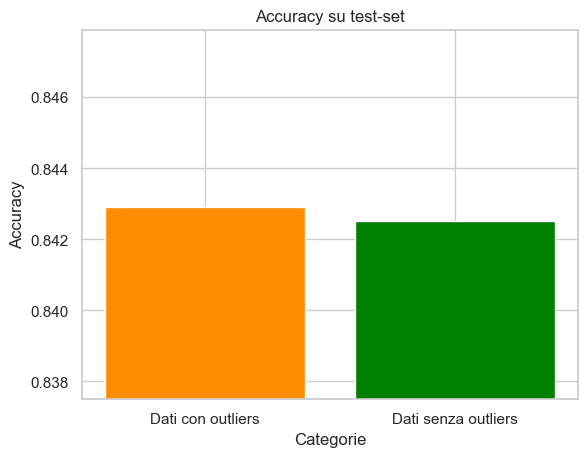

In [11]:
categorie = ["Dati con outliers", "Dati senza outliers"]
accuracy = [0.8429, 0.8425]

plt.bar(categorie, accuracy, color=['darkorange', 'green'])

plt.xlabel('Categorie')
plt.ylabel('Accuracy')
plt.title('Accuracy su test-set')


plt.ylim(min(accuracy) - 0.005, max(accuracy) + 0.005)

plt.show()

Impatto outliers su numero neighbors

In [15]:
N = [ 5 , 10, 20, 30, 50, 80,100]

KNN_results = []
for n in N:
  KNN = KNeighborsClassifier(n_neighbors=n,weights='distance',n_jobs=-1)
  KNN.fit(outscaled_dataset,np.ravel(y_trainout))
  testset_score = KNN.score(outscaled_testset, np.ravel(y_testout))
  KNN_results.append([n, testset_score])
  print(f"Score di KNN con {n} neighbors sul testset: {testset_score}")

Score di KNN con 5 neighbors sul testset: 0.8170780924194525
Score di KNN con 10 neighbors sul testset: 0.8267976054348557
Score di KNN con 20 neighbors sul testset: 0.825351449519069
Score di KNN con 30 neighbors sul testset: 0.8228290845496737
Score di KNN con 50 neighbors sul testset: 0.8160691464316944
Score di KNN con 80 neighbors sul testset: 0.8096118921100424
Score di KNN con 100 neighbors sul testset: 0.8048362144346539


In [16]:
KNN_test_scores_outliers = pd.DataFrame(KNN_results, columns=['n_neighbors','testset_score_outliers'])
KNN_test_scores_outliers


,n_neighbors,testset_score_outliers
0,5,0.817078
1,10,0.826798
2,20,0.825351
3,30,0.822829
4,50,0.816069
5,80,0.809612
6,100,0.804836


In [17]:
comparazione = pd.DataFrame({
    'n_neighbors': KNN_test_scores['n_neighbors'],
    'KNN_test_scores': KNN_test_scores['testset_score'],
    'KNN_test_scores_outliers': KNN_test_scores_outliers['testset_score_outliers']
})
comparazione['Differenza'] = comparazione['KNN_test_scores'] - comparazione['KNN_test_scores_outliers']

comparazione

,n_neighbors,KNN_test_scores,KNN_test_scores_outliers,Differenza
0,5,0.830647,0.817078,0.013569
1,10,0.841783,0.826798,0.014985
2,20,0.845241,0.825351,0.019890
3,30,0.842579,0.822829,0.019749
4,50,0.839639,0.816069,0.023570
5,80,0.835731,0.809612,0.026119
6,100,0.834140,0.804836,0.029304
